**Importing Key Libraries and Dataset**

In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading in the data
Data = pd.read_csv("Theme Park Queue Times.csv")

**Queue Times Grouped by Country**

In [ ]:
#Grouping the data by country and showing the key descriptive statistics for the queue times of each country
QueuesGroupedByCountry = Data.groupby(by="Country")["Queue Time"].describe()
QueuesGroupedByCountry

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Austria,10.0,13.500000,2.990726,10.0,12.00,12.5,14.00,20.0
Belgium,40.0,18.150000,4.577257,12.0,14.00,17.5,20.25,32.0
Brazil,10.0,46.200000,14.093340,32.0,38.00,43.0,46.75,81.0
Canada,20.0,31.200000,8.859131,18.0,25.50,31.5,37.75,47.0
China,35.0,35.142857,16.036985,14.0,23.50,32.0,40.00,83.0
Denmark,30.0,12.633333,4.366671,6.0,9.00,12.5,15.50,22.0
France,80.0,24.925000,12.707792,6.0,17.00,23.0,31.25,71.0
Germany,70.0,19.642857,6.926186,7.0,16.00,20.0,23.75,45.0
Hong Kong,10.0,42.400000,11.548930,34.0,35.25,39.5,43.25,73.0


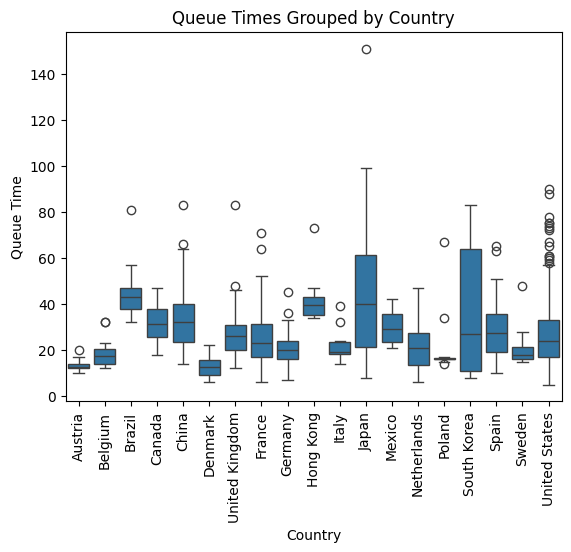

In [ ]:
#Declaring a Seaborn figure to show a boxplot of queue times by country
Axis = sns.boxplot(data=Data, x="Country", y="Queue Time")
#Rotating the x-ticks by 90 degrees for readability
plt.setp(Axis.get_xticklabels(), rotation=90)
#Adding a title to the figure
plt.title("Queue Times Grouped by Country")
#Showing the figure
plt.show()

In [ ]:
#Importing the one-way ANOVA library from SciPy's Stats library so that a one-way ANOVA can be executed
from scipy.stats import f_oneway

#Performing a one-way ANOVA so that we can determine whether there is a statistically significant difference between average queue times of countries
CountriesTestStatistic, CountriesPValue = f_oneway(Data[Data["Country"] == "Austria"]["Queue Time"],
                                                   Data[Data["Country"] == "Belgium"]["Queue Time"],
                                                   Data[Data["Country"] == "Brazil"]["Queue Time"],
                                                   Data[Data["Country"] == "Canada"]["Queue Time"],
                                                   Data[Data["Country"] == "China"]["Queue Time"],
                                                   Data[Data["Country"] == "Denmark"]["Queue Time"],
                                                   Data[Data["Country"] == "United Kingdom"]["Queue Time"],
                                                   Data[Data["Country"] == "France"]["Queue Time"],
                                                   Data[Data["Country"] == "Germany"]["Queue Time"],
                                                   Data[Data["Country"] == "Hong Kong"]["Queue Time"],
                                                   Data[Data["Country"] == "Italy"]["Queue Time"],
                                                   Data[Data["Country"] == "Japan"]["Queue Time"],
                                                   Data[Data["Country"] == "Mexico"]["Queue Time"],
                                                   Data[Data["Country"] == "Netherlands"]["Queue Time"],
                                                   Data[Data["Country"] == "Poland"]["Queue Time"],
                                                   Data[Data["Country"] == "South Korea"]["Queue Time"],
                                                   Data[Data["Country"] == "Spain"]["Queue Time"],
                                                   Data[Data["Country"] == "Sweden"]["Queue Time"],
                                                   Data[Data["Country"] == "United States"]["Queue Time"])

#Determining if the difference is statistically significant. If the p-value is below 0.05, the difference is significant. If the p-value is above 0.05, it isn't.
if CountriesPValue < 0.05:
  print("The ANOVA test returned a test statistic of {} and a p-value of {}. There is a statistically significant difference between countries in terms of average queue time.".format(CountriesTestStatistic, CountriesPValue))
else:
  print("The ANOVA test returned a test statistic of {} and a p-value of {}. There is not a statistically significant difference between countries in terms of average queue time.".format(CountriesTestStatistic, CountriesPValue))

The ANOVA test returned a test statistic of 12.111868939809408 and a p-value of 1.1913064963063913e-32. There is a statistically significant difference between countries in terms of average queue time.


The analysis shows that there is notable variation between countries in terms of average queue time for major attractions at theme parks. The descriptive statistics and boxplots show significant variation, and the ANOVA test returns a test statistic of 12.1 and a p-value well below 0.05, inferring a very statistically significant difference. Brazil and Japan are exhibiting the highest average queue times, while Denmark and Austria are exhibiting the lowest.

**Queue Times Grouped by Continent**

In [ ]:
#Grouping the data by continent and showing the key descriptive statistics for the queue times of each continent
QueuesGroupedByContinent = Data.groupby(by="Continent")["Queue Time"].describe()
QueuesGroupedByContinent

,count,mean,std,min,25%,50%,75%,max
Continent,,,,,,,,
Asia,118.0,39.652542,25.203913,8.0,21.25,34.5,56.00,151.0
Europe,406.0,22.179803,10.913337,6.0,15.00,20.0,27.00,83.0
North America,538.0,26.620818,13.073966,5.0,17.00,25.0,33.00,90.0
South America,10.0,46.200000,14.093340,32.0,38.00,43.0,46.75,81.0


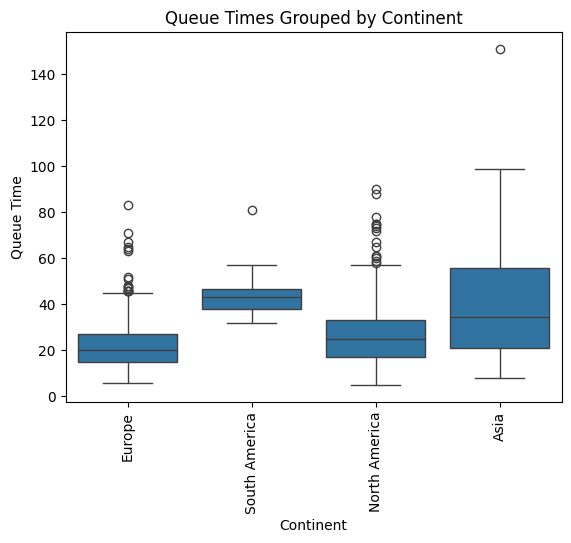

In [ ]:
#Declaring a Seaborn figure to show a boxplot of queue times by continent
Axis = sns.boxplot(data=Data, x="Continent", y="Queue Time")
#Rotating the x-ticks by 90 degrees for readability
plt.setp(Axis.get_xticklabels(), rotation=90)
#Adding a title to the figure
plt.title("Queue Times Grouped by Continent")
#Showing the figure
plt.show()

In [ ]:
#Importing the one-way ANOVA library from SciPy's Stats library so that a one-way ANOVA can be executed
from scipy.stats import f_oneway

#Performing a one-way ANOVA so that we can determine whether there is a statistically significant difference between average queue times of continents
ContinentsTestStatistic, ContinentsPValue = f_oneway(Data[Data["Continent"] == "Europe"]["Queue Time"],
                                                   Data[Data["Continent"] == "North America"]["Queue Time"],
                                                   Data[Data["Continent"] == "South America"]["Queue Time"],
                                                   Data[Data["Continent"] == "Asia"]["Queue Time"])

#Determining if the difference is statistically significant. If the p-value is below 0.05, the difference is significant. If the p-value is above 0.05, it isn't.
if ContinentsPValue < 0.05:
  print("The ANOVA test returned a test statistic of {} and a p-value of {}. There is a statistically significant difference between continents in terms of average queue time.".format(CountriesTestStatistic, CountriesPValue))
else:
  print("The ANOVA test returned a test statistic of {} and a p-value of {}. There is not a statistically significant difference between continents in terms of average queue time.".format(CountriesTestStatistic, CountriesPValue))

The ANOVA test returned a test statistic of 12.111868939809408 and a p-value of 1.1913064963063913e-32. There is a statistically significant difference between continents in terms of average queue time.


The analysis shows that there is notable variation between continents in terms of average queue time for major attractions at theme parks. The descriptive statistics and boxplots show significant variation, and the ANOVA test returns a test statistic of 12.1 and a p-value well below 0.05, inferring a very statistically significant difference. Asia and South America are exhibiting the highest average queue times, while Europe and North America are exhibiting lower averages.

**Queue Times Grouped by Operator**

In [ ]:
#Grouping the data by operator and showing the key descriptive statistics for the queue times of each operator
QueuesGroupedByOperator = Data.groupby(by="Operator")["Queue Time"].describe()
QueuesGroupedByOperator

,count,mean,std,min,25%,50%,75%,max
Operator,,,,,,,,
Chimelong Group,15.0,24.066667,6.029294,14.0,21.00,23.0,27.50,36.0
Compagnie des Alpes,70.0,22.528571,8.364385,6.0,17.00,21.0,27.75,46.0
Disney,121.0,39.884298,16.332580,9.0,30.00,36.0,47.00,88.0
Herschend,20.0,31.700000,7.753437,22.0,27.75,29.5,33.75,53.0
Looping Group,6.0,11.666667,5.785038,6.0,7.50,10.0,14.75,21.0
Mack Rides,20.0,18.250000,9.557995,7.0,9.00,20.0,22.75,45.0
Merlin,135.0,21.807407,11.233277,6.0,14.00,21.0,27.50,83.0
Other,169.0,24.047337,17.184160,6.0,14.00,18.0,27.00,83.0
Parques Reunidos,70.0,21.442857,7.445718,10.0,16.00,19.5,24.75,46.0


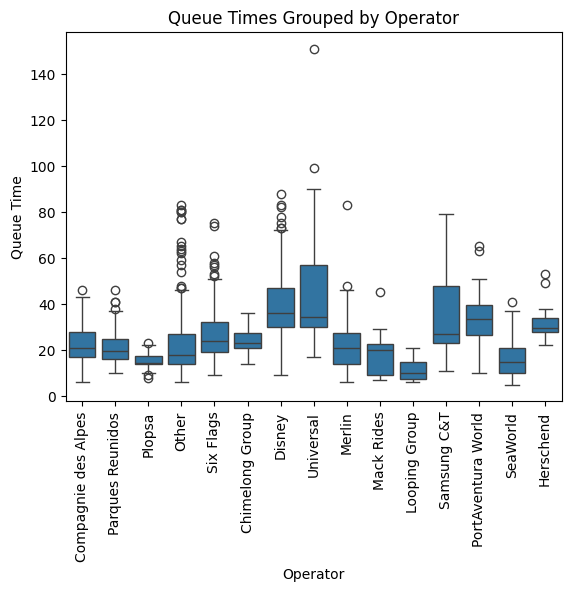

In [ ]:
#Declaring a Seaborn figure to show a boxplot of queue times by operator
Axis = sns.boxplot(data=Data, x="Operator", y="Queue Time")
#Rotating the x-ticks by 90 degrees for readability
plt.setp(Axis.get_xticklabels(), rotation=90)
#Adding a title to the figure
plt.title("Queue Times Grouped by Operator")
#Showing the figure
plt.show()

In [ ]:
#Importing the one-way ANOVA library from SciPy's Stats library so that a one-way ANOVA can be executed
from scipy.stats import f_oneway

#Performing a one-way ANOVA so that we can determine whether there is a statistically significant difference between average queue times of operators
OperatorsTestStatistic, OperatorsPValue = f_oneway(Data[Data["Operator"] == "Compagnie des Alpes"]["Queue Time"],
                                                   Data[Data["Operator"] == "Parques Reunidos"]["Queue Time"],
                                                   Data[Data["Operator"] == "Plopsa"]["Queue Time"],
                                                   Data[Data["Operator"] == "Other"]["Queue Time"],
                                                   Data[Data["Operator"] == "Six Flags"]["Queue Time"],
                                                   Data[Data["Operator"] == "Chimelong Group"]["Queue Time"],
                                                   Data[Data["Operator"] == "Disney"]["Queue Time"],
                                                   Data[Data["Operator"] == "Universal"]["Queue Time"],
                                                   Data[Data["Operator"] == "Merlin"]["Queue Time"],
                                                   Data[Data["Operator"] == "Mack Rides"]["Queue Time"],
                                                   Data[Data["Operator"] == "Looping Group"]["Queue Time"],
                                                   Data[Data["Operator"] == "Samsung C&T"]["Queue Time"],
                                                   Data[Data["Operator"] == "PortAventura World"]["Queue Time"],
                                                   Data[Data["Operator"] == "SeaWorld"]["Queue Time"],
                                                   Data[Data["Operator"] == "Herschend"]["Queue Time"])

#Determining if the difference is statistically significant. If the p-value is below 0.05, the difference is significant. If the p-value is above 0.05, it isn't.
if OperatorsPValue < 0.05:
  print("The ANOVA test returned a test statistic of {} and a p-value of {}. There is a statistically significant difference between countries in terms of average queue time.".format(OperatorsTestStatistic, OperatorsPValue))
else:
  print("The ANOVA test returned a test statistic of {} and a p-value of {}. There is not a statistically significant difference between countries in terms of average queue time.".format(OperatorsTestStatistic, OperatorsPValue))

The ANOVA test returned a test statistic of 24.198805127167425 and a p-value of 1.0270849912523253e-54. There is a statistically significant difference between countries in terms of average queue time.


The analysis shows that there is notable variation between operators in terms of average queue time for major attractions at theme parks. The descriptive statistics and boxplots show significant variation, and the ANOVA test returns a test statistic of 24.2 and a p-value well below 0.05, inferring a very statistically significant difference. With the test statistic being higher, this would suggest that the difference between operators is more statistically significant than that between countries. Disney and Universal are exhibiting the highest average queue times, while Looping Group, Plopsa and SeaWorld are exhibiting some of the lowest.